In [2]:
import cv2
import os

import matplotlib.pyplot as plt
import numpy as np

from random import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
class Data:
    def __init__(self, img_size, dataset_path="../Data"):
        self.img_size = img_size

        # Define emotion labels (folder names)
        emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

        # Load training data
        self.X_train, self.y_train = [], []
        for label, emotion in enumerate(emotions):
            train_path = os.path.join(dataset_path, "train", emotion)
            imgs, labels = self.load_images_from_folder(train_path, label)
            self.X_train.extend(imgs)
            self.y_train.extend(labels)

        # Load test data
        self.X_test, self.y_test = [], []
        for label, emotion in enumerate(emotions):
            test_path = os.path.join(dataset_path, "test", emotion)
            imgs, labels = self.load_images_from_folder(test_path, label)
            self.X_test.extend(imgs)
            self.y_test.extend(labels)

        # shuffle the test data
        combined = list(zip(self.X_test, self.y_test))
        shuffle(combined)
        self.X_test, self.y_test = zip(*combined)
        self.X_test = list(self.X_test)
        self.y_test = list(self.y_test)

        # Convert lists to NumPy arrays and normalize from 0-255 to 0-1
        self.X_train = np.array(self.X_train, dtype="float32") / 255.0  
        self.X_test = np.array(self.X_test, dtype="float32") / 255.0
        self.y_train = np.array(self.y_train)
        self.y_test = np.array(self.y_test)

        # One-hot encode labels
        self.y_train = to_categorical(self.y_train, num_classes=len(emotions))
        self.y_test = to_categorical(self.y_test, num_classes=len(emotions))

        # Split training data into training (80%) and validation (20%) sets
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=0.2, random_state=42)

        # Reshape X for CNN input (add channel dimension)
        self.X_train = self.X_train.reshape(-1, img_size, img_size, 1)
        self.X_val = self.X_val.reshape(-1, img_size, img_size, 1)
        self.X_test = self.X_test.reshape(-1, img_size, img_size, 1)

    def load_images_from_folder(self, folder_path, label):
        """Load images from a specific folder and return them with labels."""
        images, labels = [], []
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:  # Ensure image is loaded correctly
                img = cv2.resize(img, (self.img_size, self.img_size)) 
                images.append(img)
                labels.append(label)
        return images, labels

    def __repr__(self):
        return f"Training samples: {self.X_train.shape}, Validation samples: {self.X_val.shape}, Testing samples: {self.X_test.shape}"

In [35]:
data = Data(img_size=48)
print("X_train shape:", data.X_train.shape)
print("X_test shape:", data.X_test.shape)
print("y_train shape:", data.y_train.shape)
print("y_test shape:", data.y_test.shape)
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

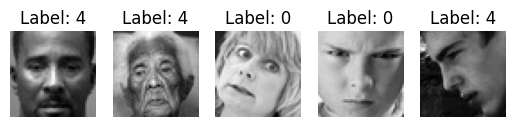

In [5]:
# test
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(data.X_train[i].squeeze(), cmap="gray")  
    plt.title(f"Label: {np.argmax(data.y_train[i])}")  
    plt.axis("off")

plt.show()
